In [13]:
import seaborn as sns
import numpy as np
import pandas as pd

In [14]:
import podlozhnyy_module as pm

### Test Data

In [22]:
df = sns.load_dataset('tips')
df.shape

(244, 7)

In [23]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Bootstrap

In [10]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [11]:
a = pm.bootstrap.Bootstrap(n_samples=10_000, statistic=75)

In [12]:
a.bootstrap_confint(df.tip.values, alpha=0.1, method='central')

array([3.125, 3.645])

In [13]:
a.bootstrap_confint(df.tip.values, alpha=0.1, method='percentile')

array([3.48, 4.  ])

In [14]:
a.bootstrap_confint(df.tip.values, alpha=0.1, method='central')

array([3.125, 3.64 ])

### Charts

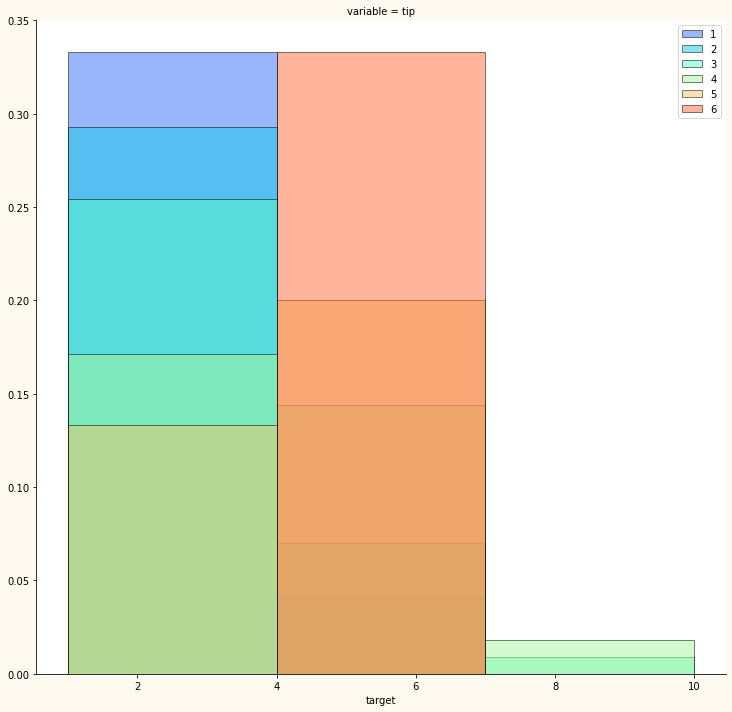

In [6]:
pm.charts.plot_hist(df, 'tip', 'size', 3)

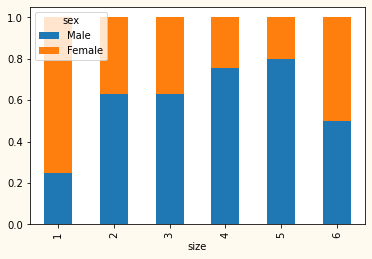

In [7]:
pm.charts.plot_stacked_hist(df, 'sex', 'size')

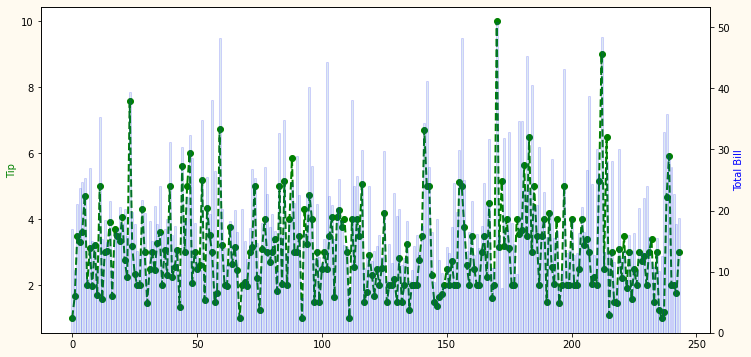

In [8]:
pm.charts.plot_dual_axis(df, 'tip', 'total_bill')

### Collocations

In [23]:
documents = {}
for i in range(100):
    row = []
    for _ in range(10):
        a = np.random.choice(['word', '']) + str(np.random.randint(10))
        if a not in set():
            row.append(a)
    documents.update({tuple(row): 1})

In [24]:
smd = pm.collocation.source_matching_dictionary(
    documents,
    lengths=[3, 2]
)

### Correlation

In [24]:
pm.correlation.correlation_significance(df, pvalue=False)

,total_bill,tip,size
total_bill,1.000,0.676,0.598
tip,0.676,1.000,0.489
size,0.598,0.489,1.000


In [25]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [26]:
pm.correlation.correlation_significance(df, include='categorical', pvalue=False)

,sex,smoker,day,time
sex,1.000,0.006,0.233,0.196
smoker,0.006,1.000,0.325,0.046
day,0.233,0.325,1.000,0.943
time,0.196,0.046,0.943,1.000


In [27]:
extra = df.tip.values.copy()
np.random.shuffle(extra)
df['extra'] = extra

In [29]:
pm.correlation.correlation_significance(df)

,total_bill,tip,size,extra
total_bill,1.000,0.676,0.598,-0.103
tip,0.676,1.000,0.489,-0.082
size,0.598,0.489,1.000,-0.039
extra,-0.103,-0.082,-0.039,1.000


<Figure size 864x864 with 0 Axes>

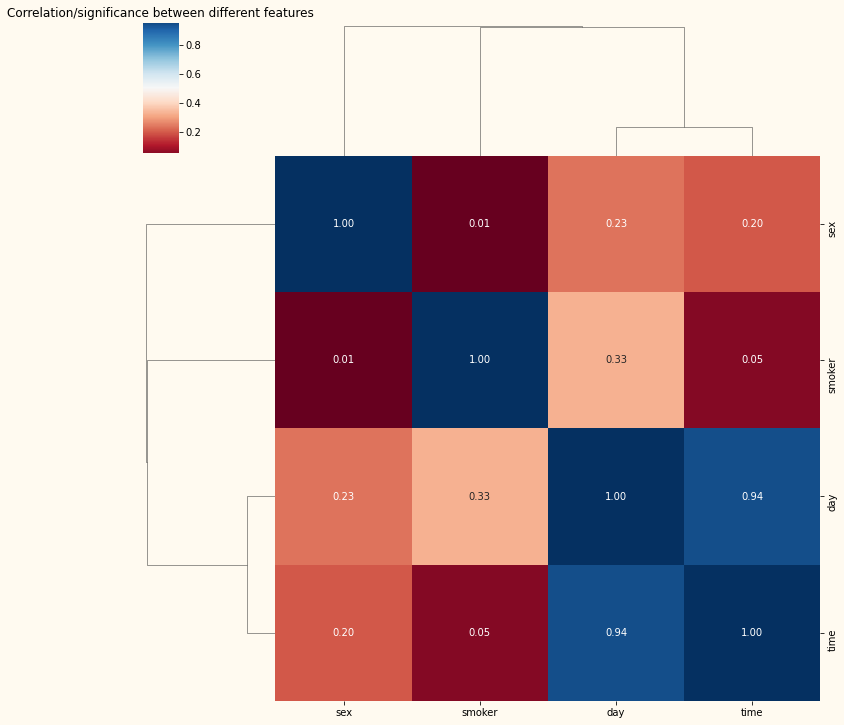

In [32]:
pm.correlation.plot_corr_matrix(
    df,
    diagram='cluster',
    clustering='single',
    include='categorical',
    pvalue=False
)

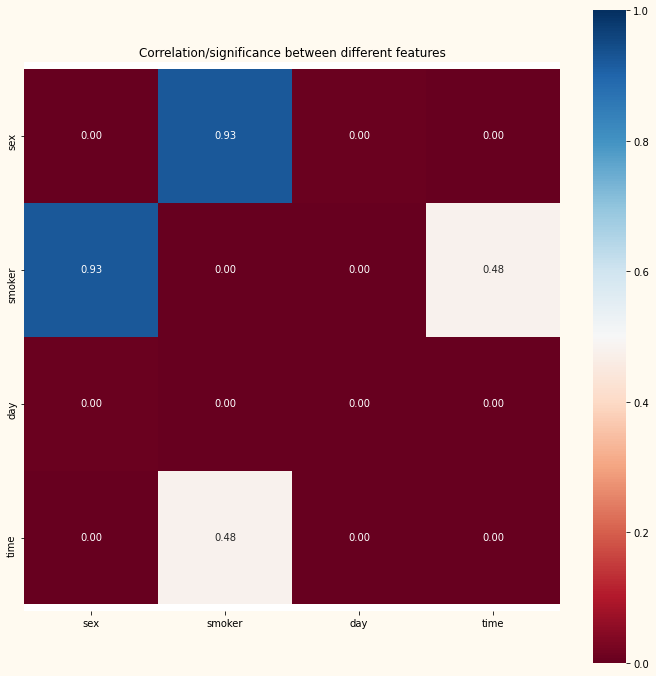

In [34]:
pm.correlation.plot_corr_matrix(df, include='categorical', pvalue=True)

### Pareto

In [9]:
a = pm.pareto.ParetoExtended(1.5, 1, 0.20)

In [10]:
a.rvs(5)

array([1.34902271, 1.        , 1.77896623, 1.94478168, 1.96140268])

In [11]:
a.cdf(3)

0.8460399282160997

In [12]:
a.ppf(0.8)

2.519842099789747

In [13]:
a.pdf(3)

0.0769800358919501

In [14]:
a.mean()

2.6000000000000005

In [15]:
from scipy.stats import pareto

In [19]:
a = pareto(b=2, loc=14)
sample = a.rvs(10)

In [20]:
pm.pareto.ParetoApprox(sample)

{'alpha': 1.093057289625377,
 'loc': 14.838470475489496,
 'scale': 0.21262738504032097}

In [21]:
sample.min()

15.027433675559548

### Permutation

In [5]:
pm.permutation.permutation_t_stat([1, 2, 3, 4, 5], [10, -4, 0, 3, -2])

1.6

In [6]:
pm.permutation.get_random_combinations(5, 10, 10)

[((4, 10, 0, 3, 5), (8, 11, 1, 12, 9, 7, 14, 6, 13, 2)),
 ((10, 2, 12, 4, 13), (0, 11, 8, 6, 3, 5, 14, 7, 9, 1)),
 ((0, 6, 5, 8, 14), (9, 3, 4, 10, 11, 7, 1, 2, 12, 13)),
 ((0, 1, 2, 3, 4), (5, 6, 7, 8, 9, 10, 11, 12, 13, 14)),
 ((10, 3, 12, 14, 7), (13, 8, 5, 6, 0, 2, 1, 4, 9, 11)),
 ((4, 12, 0, 1, 6), (7, 13, 14, 11, 10, 3, 8, 5, 2, 9)),
 ((12, 1, 10, 2, 3), (13, 7, 5, 0, 4, 6, 11, 9, 14, 8)),
 ((0, 10, 2, 7, 6), (14, 9, 11, 12, 3, 13, 4, 1, 8, 5)),
 ((8, 10, 4, 5, 6), (0, 1, 14, 13, 9, 2, 11, 3, 12, 7)),
 ((5, 3, 7, 8, 2), (9, 0, 12, 14, 10, 11, 13, 6, 4, 1))]

In [7]:
pm.permutation.get_random_permutations(5, 10)

{(-1, -1, -1, -1, 1),
 (-1, -1, 1, -1, -1),
 (-1, -1, 1, 1, -1),
 (-1, -1, 1, 1, 1),
 (-1, 1, 1, -1, -1),
 (1, -1, -1, -1, 1),
 (1, -1, 1, -1, 1),
 (1, -1, 1, 1, 1),
 (1, 1, -1, -1, -1),
 (1, 1, 1, -1, -1)}

In [8]:
pm.permutation.permutation_zero_dist_ind([1, 2, 3, 4, 5], [10, -4, 0, 3, -2], 10)

[1.1999999999999997,
 0.8,
 -0.8,
 0.3999999999999999,
 -2.0,
 0.0,
 -2.4,
 1.6,
 1.6,
 1.6]

In [9]:
a = [1, 2, 3, 4, 5]
b = [10, -4, 0, 3, -2]

In [10]:
pm.permutation.permutation_test(a, b, kind='related', alternative='greater')

0.3125

In [11]:
pm.permutation.permutation_test(a, b, kind='related', alternative='less')

0.75

In [12]:
pm.permutation.permutation_test(a, b)

0.31746031746031744

In [13]:
pm.permutation.permutation_test(a, 5)

0.125

### Regression

In [36]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [39]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [40]:
for clf in [LinearRegression(), RandomForestRegressor(),
           DecisionTreeRegressor(), LogisticRegression()]:
    print(clf)
    a = pm.regression.regression_report(X, y.values, clf, verbose=True)
    print()

LinearRegression()
r2_test = 0.393 (r2_train = 0.417, p_value = 0.0)

day/Sun : 0.224
smoker/No : 0.165
time/Lunch : 0.143
day/Sat : 0.092
tip : 0.081
total_bill : 0.058

RandomForestRegressor()
r2_test = 0.021 (r2_train = 0.902, p_value = 0.0)

total_bill : 0.616
tip : 0.197

DecisionTreeRegressor()
r2_test = 0.136 (r2_train = 1.0, p_value = 0.0)

total_bill : 0.596
tip : 0.166
smoker/Yes : 0.1

LogisticRegression()
r2_test = -0.154 (r2_train = 0.187, p_value = 0.344)

time/Dinner : 1.183
day/Thur : 1.107
smoker/Yes : 1.091
sex/Male : 0.732
sex/Female : 0.545
day/Fri : 0.463
smoker/No : 0.187
time/Lunch : 0.095
day/Sat : 0.088



c:\users\podlo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
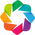

In [43]:
import holoviews as hv
hv.extension('bokeh')

In [44]:
%%output size=144
pm.regression.check_homoscedacity(df, 'size', 'tip')

:Scatter   [Estimated target]   (Residual)

In [45]:
%%output size=144
pm.regression.check_linearity(df, 'size', 'tip')

:Overlay
   .Scatter.Проверка_линейности_зависимости_tip_от_size :Scatter   [size]   (tip)
   .Curve.I                                             :Curve   [x]   (y)

### Timeseries

In [5]:
from scipy.optimize import minimize

In [6]:
data = df.total_bill

In [7]:
opt = minimize(pm.timeseries.timeseriesCVscore, x0=[0, 0, 0], args=(data, ),
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1)))

In [8]:
opt

     fun: 103.52194682112895
     jac: array([-0.01003144, -0.00860183,  1.42591006])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 188
     nit: 13
  status: 1
 success: True
       x: array([0.01897211, 0.04161007, 0.        ])

In [9]:
a = pm.timeseries.HoltWinters(series=data.values, 
    slen=7,
    alpha=0.02,
    beta=0.04,
    gamma=0,
    n_preds=5,)

In [10]:
a.triple_exponential_smoothing()

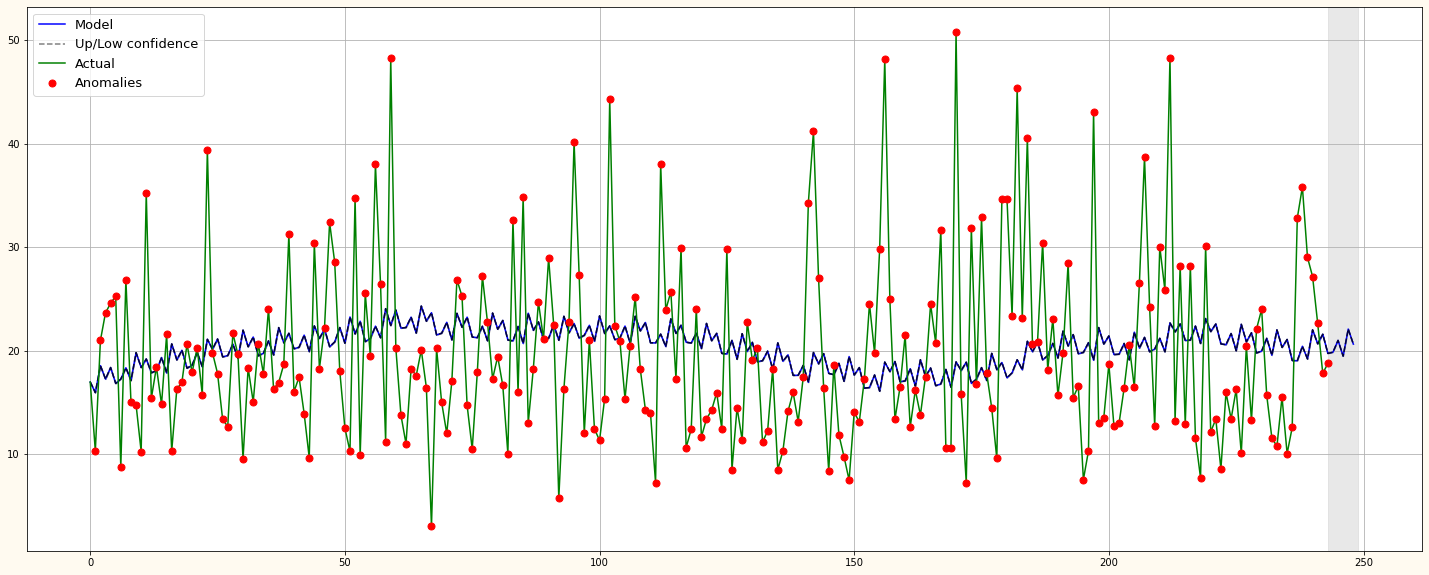

In [11]:
pm.timeseries.plotHoltWinters(a, df, 'total_bill', predict_interval=5, )

### Timetest

In [5]:
df['y'] = df['size'] % 2

In [6]:
df['flagg'] = df.sex == 'Male'

In [7]:
df['new'] = 'abc'

In [8]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
y                int64
flagg             bool
new             object
dtype: object

In [9]:
df.describe()

,total_bill,tip,size,y
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.192623
std,8.902412,1.383638,0.951100,0.395170
min,3.070000,1.000000,1.000000,0.000000
25%,13.347500,2.000000,2.000000,0.000000
50%,17.795000,2.900000,2.000000,0.000000
75%,24.127500,3.562500,3.000000,0.000000
max,50.810000,10.000000,6.000000,1.000000


In [15]:
pm.timetest.stat_difference_by_flg(df, 'new', 'y', 'Y', flg='flagg', num_buck=2)

,Y_decrease_overall,Y_decrease_mean,Y_decrease_min,Y_decrease_max
bucket,,,,
abc,0.022183,0.022183,-0.082366,0.126732
